In [1]:
# pandas for dataframes and reading excel data
import pandas as pd

# numpy for matrix calculations
import numpy as np

# matplotlob for plotting data
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_excel('data sheet.xlsx', sheetname='Sheet1')
data.head()

85

In [3]:
# drop unnecessary details
data.drop('DATE', axis=1, inplace=True)
data.drop('SI.NO', axis=1, inplace=True)
data.drop('NAME', axis=1, inplace=True)

# recheck the data
data.head()

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,29,Male,no,no,no,"115, 115, 113",114.30
1,36,Female,no,no,no,"95,94,96",94.00
2,37,Male,no,no,no,"80,82,81",81.00
3,37,Female,no,no,no,"100, 101, 100",100.33
4,38,female,no,no,no,9.91001e+07,99.80


In [4]:
# shape of the data
data.shape

(50, 7)

In [5]:
# we have 50 rows and 7 columns
# our best bet would be to do One Shot learning

In [6]:
# we will convert data into lowercase
data['SEX'] = data['SEX'].str.lower()
data['MEDIC_PROB'] = data['ASSO MEDICAL PROB'].str.lower()
data['INJURY_SURGERY'] = data['H/O INJURY/SURGERY'].str.lower()
data['DRUG_HISTORY'] = data['DRUG HISTORY'].str.lower()
data['AVG'] = data['avg']

data.drop( ['ASSO MEDICAL PROB','H/O INJURY/SURGERY','DRUG HISTORY', 'avg' ], axis=1 ,inplace=True)

data.tail()

,AGE,SEX,FREQUENCY,MEDIC_PROB,INJURY_SURGERY,DRUG_HISTORY,AVG
45,72,male,"68, 69, 68",no,no,no,68.30
46,72,male,"69,70,71","yes(diabetes,blockage in heart)",shouler surgery,yes,70.00
47,74,female,"63,62,62.6","yes(diabetes,bp)",knee surgery,yes,62.53
48,76,male,"62,61,62.5","yes(diabetes,kidney stone)",no,no,61.83
49,85,male,"62,63,64","yes (diabetes,heart blockage)",yes(open heart surgery),yes,63.00


In [7]:
# now we need to cahnge our data into computer recognizable data.
# from strings in sex and medical prob and others to integers

# changing SEX
data['SEX'] = data['SEX'] == 'female'
data['SEX'] = data['SEX'].map({ True:1, False:0 })

# changing medical probelm data
data['MEDIC_PROB'] = data['MEDIC_PROB'] == 'no'
data['MEDIC_PROB'] = data['MEDIC_PROB'].map({ True:0, False:1 })

# changing Injury surgery data
data['INJURY_SURGERY'] = data['INJURY_SURGERY'] == 'no'
data['INJURY_SURGERY'] = data['INJURY_SURGERY'].map({ True:0, False:1 })

# changing drug history data
data['DRUG_HISTORY'] = data['DRUG_HISTORY'] == 'no'
data['DRUG_HISTORY'] = data['DRUG_HISTORY'].map({ True:0, False:1 })

# adding category for Osteoporosis, Osteopenia and Normal conditions
# Normal 0 -- Osteopenia 1 -- Osteoporosis 2
def categorize_data(freq):
    # if frequency is less than 70, the subject is Osteoporotic
    if(freq<60):
        return 2
    # if frequency is less than 100 and greate than 70, the subject is Osteopeniac
    elif(freq<100):
        return 1
    # if frequency is greater than 100, the subject is Normal
    else:
        return 0
        

data['CATEGORY'] = data['AVG'].map(categorize_data)

In [8]:
# we know that some 'yes' had other details so we will fill 
# the Assoc medical problems and injury surgery as 1.
data.fillna(-999999999)

# removing the FREQUENCY column since it's average is stored in 'avg' column
data.drop('FREQUENCY',axis= 1, inplace=True)
data.head()

,AGE,SEX,MEDIC_PROB,INJURY_SURGERY,DRUG_HISTORY,AVG,CATEGORY
0,29,0,0,0,0,114.30,0
1,36,1,0,0,0,94.00,1
2,37,0,0,0,0,81.00,1
3,37,1,0,0,0,100.33,0
4,38,1,0,0,0,99.80,1


In [9]:
# export unscaled data
import pickle

with open('data_processed_unscaled.pickle', 'wb') as file:
    pickle.dump(data, file)

# export unscaled data as csv
data.to_csv('data_processed_unscaled.csv', index=False, encoding='utf-8')

In [10]:
# now, since the data is not scaled we will scale each column into a songle range 0 to 2
from sklearn.preprocessing import MinMaxScaler

data_scaled = MinMaxScaler().fit_transform(data)

In [11]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.columns = data.columns
df_scaled.head()

,AGE,SEX,MEDIC_PROB,INJURY_SURGERY,DRUG_HISTORY,AVG,CATEGORY
0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
1,0.125000,1.0,0.0,0.0,0.0,0.616764,1.0
2,0.142857,0.0,0.0,0.0,0.0,0.371342,1.0
3,0.142857,1.0,0.0,0.0,0.0,0.736266,0.0
4,0.160714,1.0,0.0,0.0,0.0,0.726260,1.0


In [12]:
# export unscaled data
import pickle

with open('data_processed_scaled.pickle', 'wb') as file:
    pickle.dump(df_scaled, file)

# export scaled data as csv
df_scaled.to_csv('data_processed_scaled.csv', index=False, encoding='utf-8')

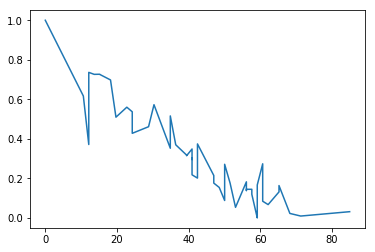

In [19]:
# plot the data
from matplotlib import pyplot as plt

plt.plot(df_scaled['AGE'] * 85, df_scaled['AVG'])
plt.show()